In [343]:
from sklearn.pipeline import Pipeline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,MinMaxScaler,PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectKBest,f_regression
import numpy as np
from sklearn.inspection import permutation_importance
from sklearn.ensemble import RandomForestRegressor
import pickle

In [2]:
dataset = pd.read_csv("/content/StudentPerformanceFactors.csv")

In [ ]:
dataset.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [ ]:
dataset.shape

(6607, 20)

In [ ]:
dataset.isnull().sum()

,0
Hours_Studied,0
Attendance,0
Parental_Involvement,0
Access_to_Resources,0
Extracurricular_Activities,0
Sleep_Hours,0
Previous_Scores,0
Motivation_Level,0
Internet_Access,0
Tutoring_Sessions,0


In [ ]:
dataset[dataset['Parental_Education_Level'].isnull()]

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
240,15,87,Low,Medium,No,4,54,Medium,Yes,1,Medium,Medium,Public,Neutral,6,No,NaN,Moderate,Male,65
408,21,65,High,High,No,7,88,Low,Yes,2,Low,Medium,Private,Neutral,1,No,NaN,Near,Male,65
417,21,91,High,Medium,No,9,74,Medium,Yes,2,Low,Low,Private,Negative,2,No,NaN,Near,Female,69
451,26,94,High,Medium,Yes,10,54,Low,Yes,2,High,Medium,Public,Neutral,5,No,NaN,Near,Male,73
592,23,85,High,Low,Yes,6,59,Low,Yes,1,Medium,Medium,Public,Negative,1,No,NaN,Near,Male,68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6253,22,85,High,Medium,Yes,6,96,Medium,Yes,0,Low,Medium,Public,Neutral,3,No,NaN,Moderate,Female,69
6323,28,72,Low,High,No,8,63,Low,Yes,1,Low,High,Public,Neutral,2,No,NaN,Near,Male,66
6411,19,92,High,Medium,No,6,70,High,Yes,2,Medium,Medium,Private,Negative,3,No,NaN,Near,Female,71
6423,21,70,Medium,High,Yes,5,62,Medium,Yes,2,Low,High,Public,Neutral,2,No,NaN,Near,Female,66


In [3]:
dataset.dropna(inplace=True)

In [ ]:
dataset

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6378 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6378 non-null   int64 
 1   Attendance                  6378 non-null   int64 
 2   Parental_Involvement        6378 non-null   object
 3   Access_to_Resources         6378 non-null   object
 4   Extracurricular_Activities  6378 non-null   object
 5   Sleep_Hours                 6378 non-null   int64 
 6   Previous_Scores             6378 non-null   int64 
 7   Motivation_Level            6378 non-null   object
 8   Internet_Access             6378 non-null   object
 9   Tutoring_Sessions           6378 non-null   int64 
 10  Family_Income               6378 non-null   object
 11  Teacher_Quality             6378 non-null   object
 12  School_Type                 6378 non-null   object
 13  Peer_Influence              6378 non-null   object
 1

In [4]:
cols=dataset.select_dtypes(object).columns

In [ ]:
dataset.groupby('Exam_Score')[cols].value_counts()

Exam_Score  Parental_Involvement  Access_to_Resources  Extracurricular_Activities  Motivation_Level  Internet_Access  Family_Income  Teacher_Quality  School_Type  Peer_Influence  Learning_Disabilities  Parental_Education_Level  Distance_from_Home  Gender
55          Medium                Low                  No                          Medium            Yes              Low            Medium           Public       Negative        No                     High School               Near                Male      1
56          Low                   High                 No                          Medium            Yes              Low            Medium           Private      Negative        No                     College                   Far                 Male      1
57          High                  Low                  Yes                         High              Yes              Low            Medium           Public       Negative        Yes                    College                   Moderate            Male      1
            Low                   Low                  Yes                         Low               Yes              Low            Medium           Public       Neutral         No                     High School               Far                 Female    1
            Medium                Low                  Yes                         Low               Yes              Low            Medium           Public       Positive        No                     Postgraduate              Near                Female    1
                                                                                                                                                                                                                                                                 ..
98          Low                   Medium               Yes                         Medium            Yes              Medium         Medium           Public       Positive        No                     College                   Moderate            Female    1
99          High                  High                 Yes                         Low               Yes              Medium         Medium           Public       Negative        No                     High School               Far                 Male      1
                                                                                   Medium            Yes              Medium         Medium           Private      Negative        No                     High School               Near                Female    1
100         High                  Medium               Yes                         Medium            Yes              High           Medium           Private      Positive        No                     College                   Near                Female    1
101         Low                   Medium               Yes                         Low               No               High           High             Public       Positive        No                     High School               Moderate            Female    1
Name: count, Length: 6260, dtype: int64

In [ ]:
dataset['Exam_Score'].mean()

np.float64(67.25211665098777)

In [ ]:
dataset['Exam_Score'].max()

101

In [ ]:
dataset['Exam_Score'].min()

55

<Axes: xlabel='variable,value'>

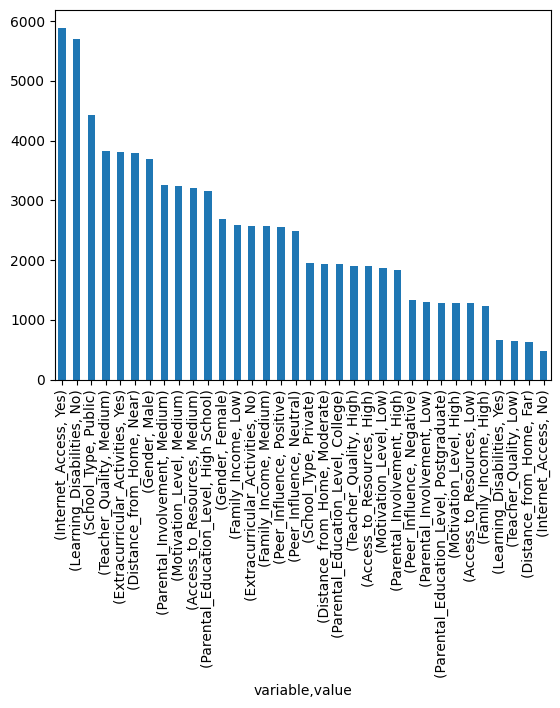

In [ ]:
dataset[cols].melt().value_counts().plot(kind='bar')

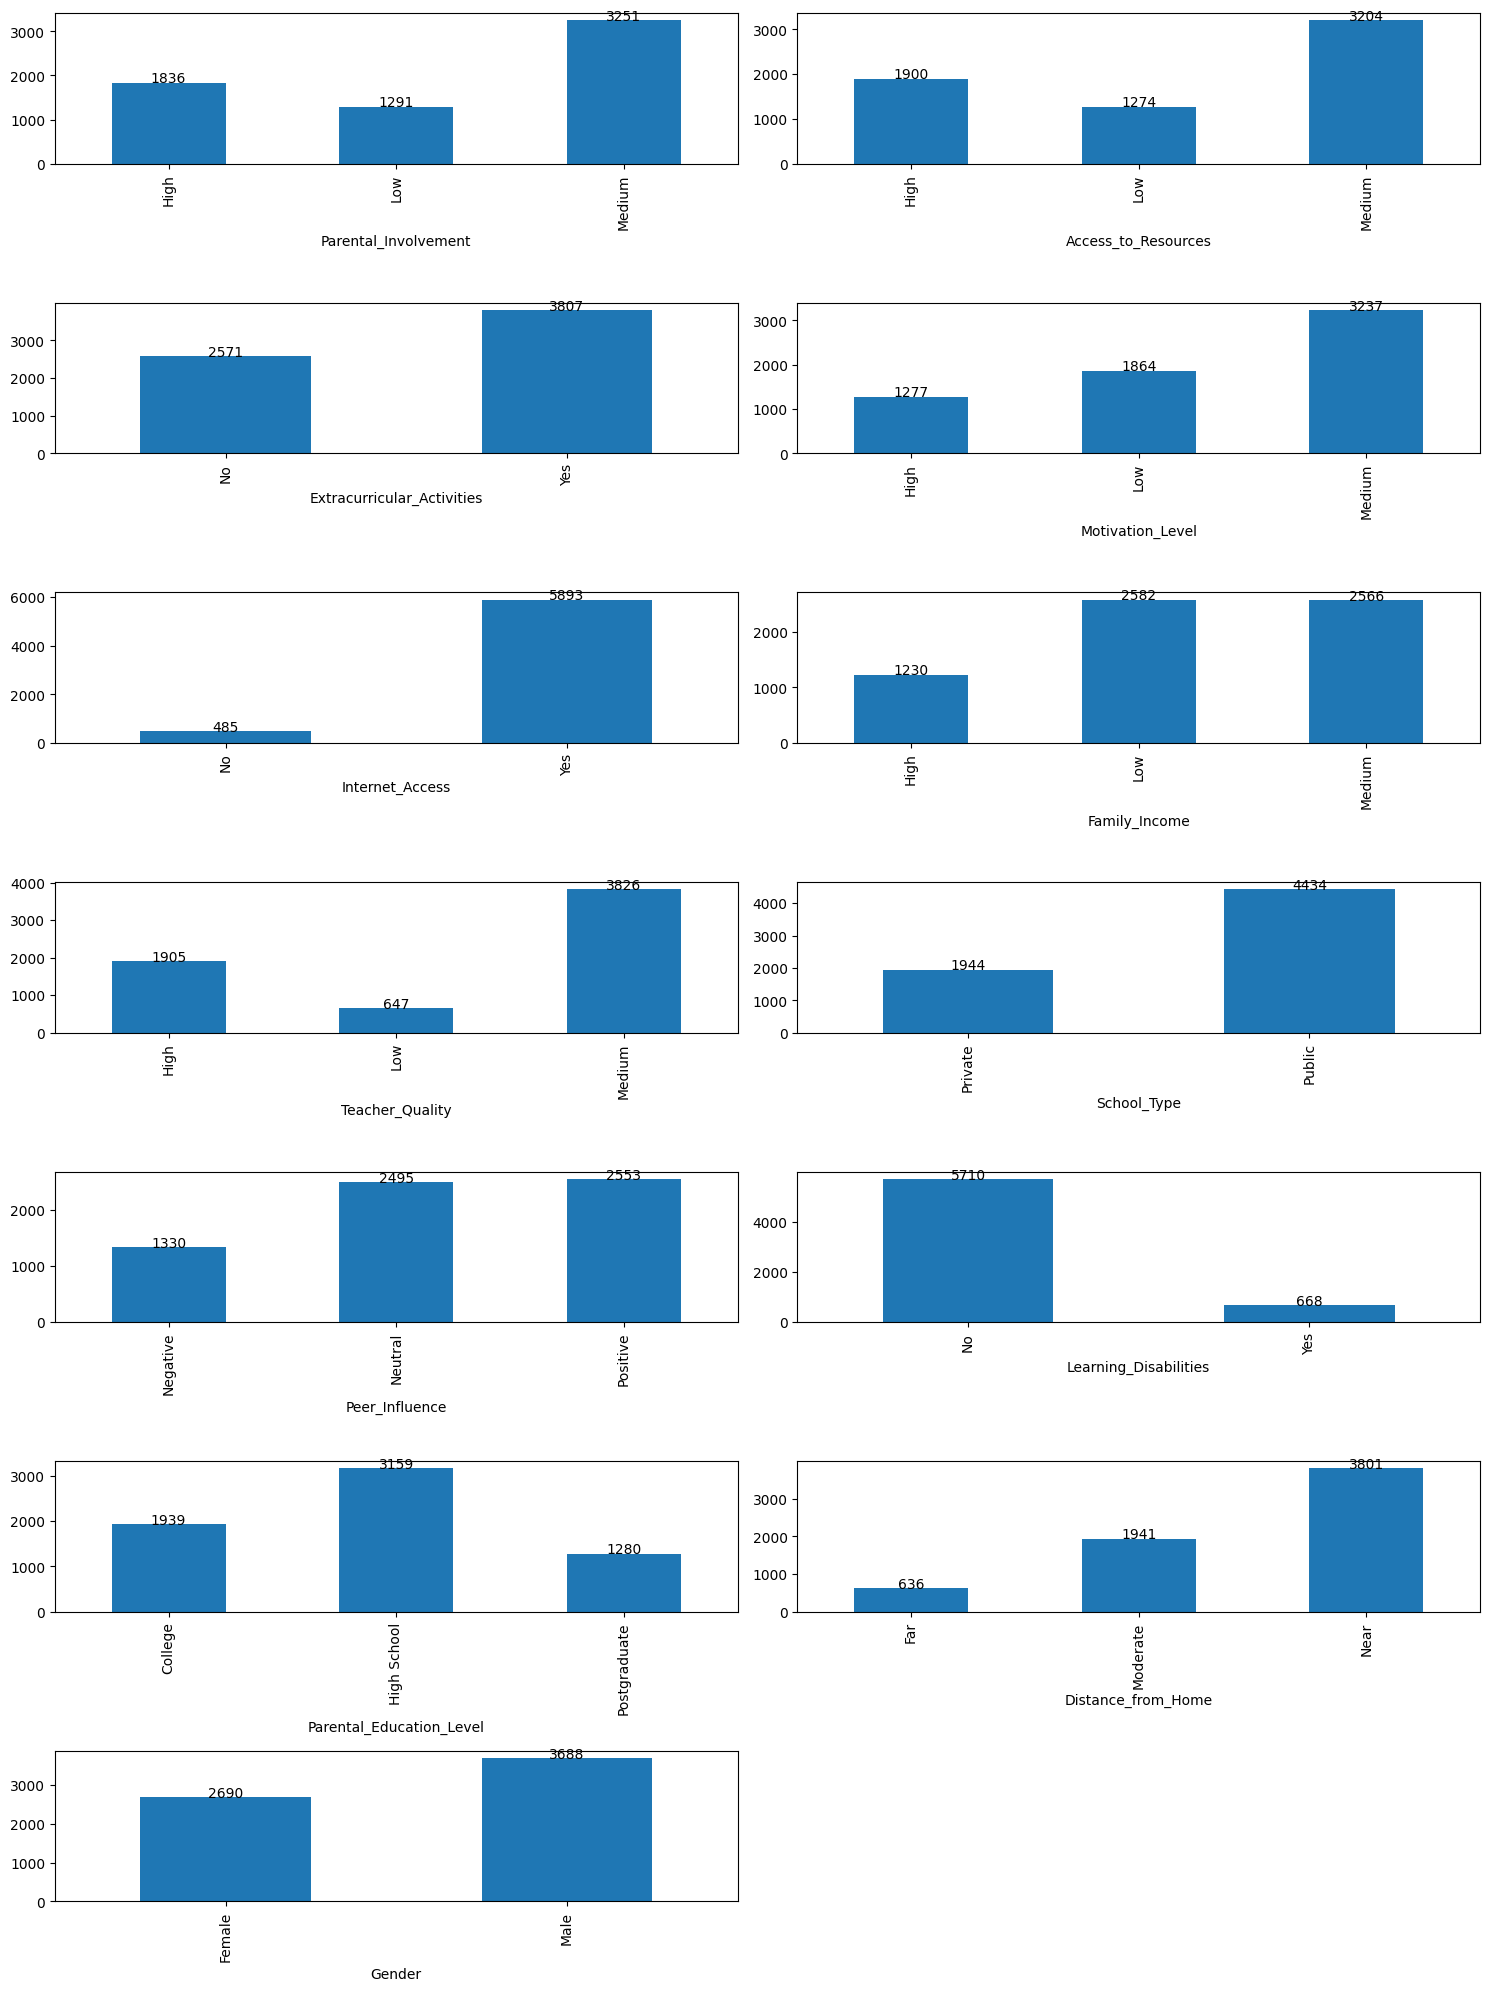

In [ ]:
plt.figure(figsize=(15,20))
for i,col in enumerate(cols):
  plt.subplot(7,2,i+1)
  counts=dataset.groupby(col)['Exam_Score'].apply(lambda x:(x>50).sum())
  ax=counts.plot(kind='bar')
  for j,val in enumerate(counts):
    ax.text(j,val+0.5,str(val),ha='center')

plt.tight_layout()
plt.show()


In [6]:
int_cols = dataset.select_dtypes(int).columns

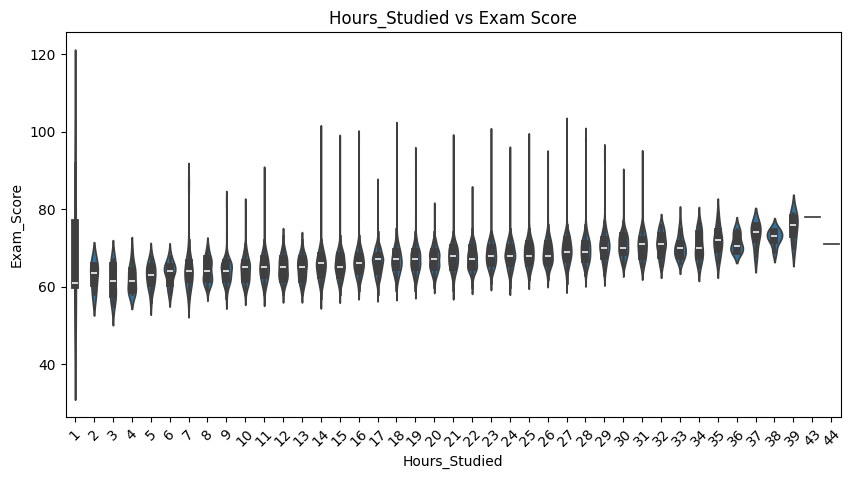

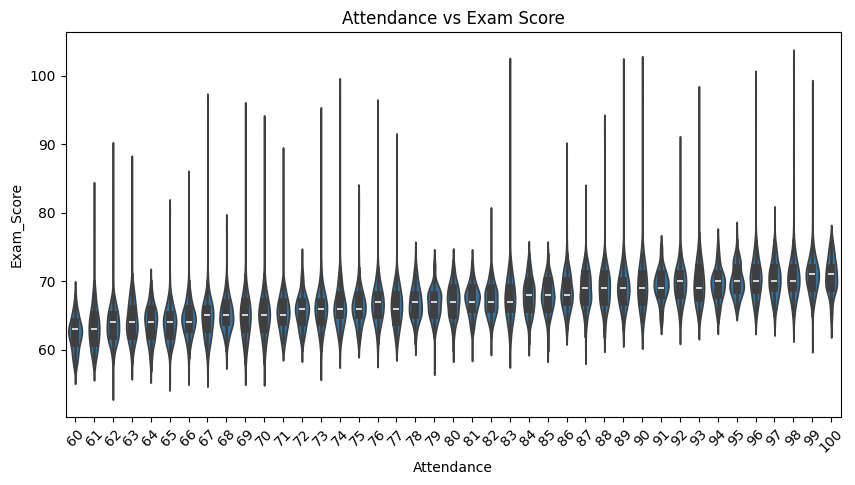

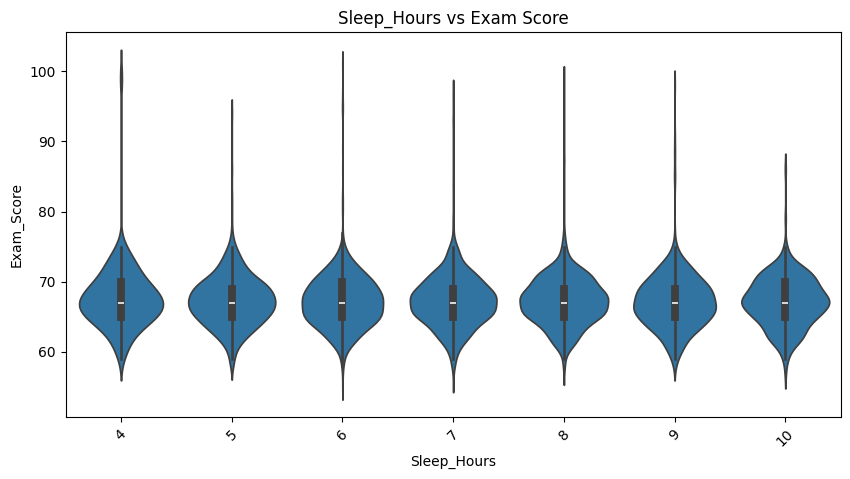

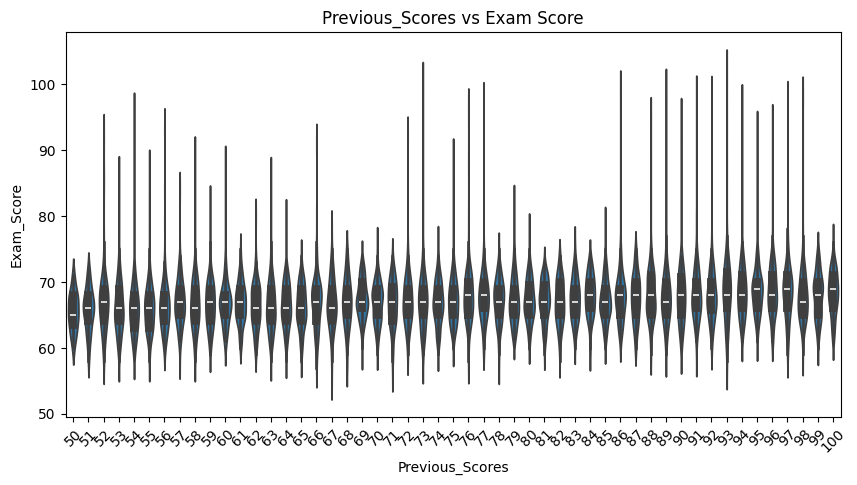

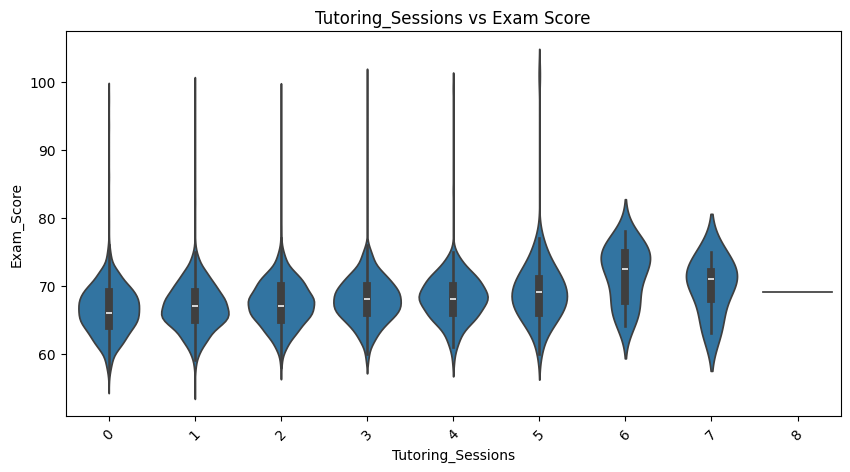

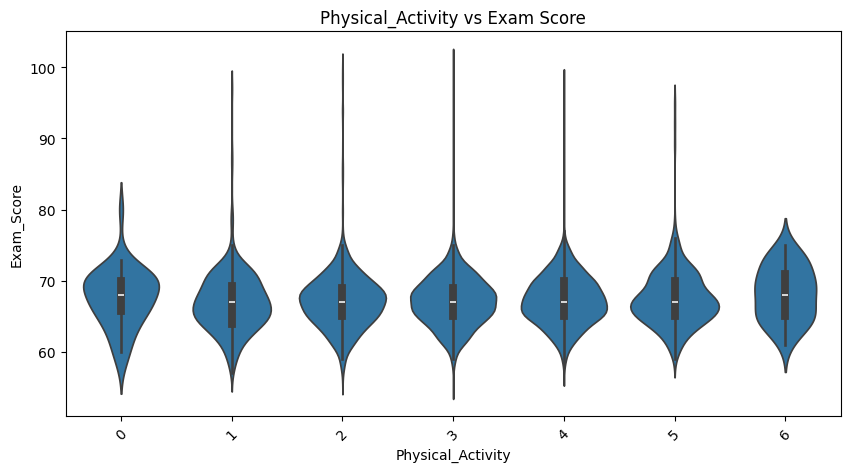

In [ ]:
import seaborn as sns
for col in int_cols[:-1]:
    plt.figure(figsize=(10,5))
    sns.violinplot(x=dataset[col], y=dataset['Exam_Score'])
    plt.title(f"{col} vs Exam Score")
    plt.xticks(rotation=45)
    plt.show()


In [7]:
mapping ={'Low':0,'Medium':1,'High':2,'No':0,'Yes':1,'Positive':1,'Negative':0,'Neutral':2,
          'Male':0,'Female':1,'Near':0,'Moderate':2,'Far':1,'High School':0,'College':1,'Postgraduate':2,
          'Public':0,'Private':1}
encoded_dataset=dataset.replace(mapping)

/tmp/ipython-input-1765493006.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  encoded_dataset=dataset.replace(mapping)


In [ ]:
encoded_dataset

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,0,2,0,7,73,0,1,0,0,1,0,1,3,0,0,0,0,67
1,19,64,0,1,0,8,59,0,1,2,1,1,0,0,4,0,1,2,1,61
2,24,98,1,1,1,7,91,1,1,2,1,1,0,2,4,0,2,0,0,74
3,29,89,0,1,1,8,98,1,1,1,1,1,0,0,4,0,0,2,0,71
4,19,92,1,1,1,6,65,1,1,3,1,2,0,2,4,0,1,0,1,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,2,1,0,7,76,1,1,1,2,1,0,1,2,0,0,0,1,68
6603,23,76,2,1,0,8,81,1,1,3,0,2,0,1,2,0,0,0,1,69
6604,20,90,1,0,1,6,65,0,1,3,0,1,0,0,2,0,2,0,1,68
6605,10,86,2,2,1,6,91,2,1,2,0,1,1,1,3,0,0,1,1,68


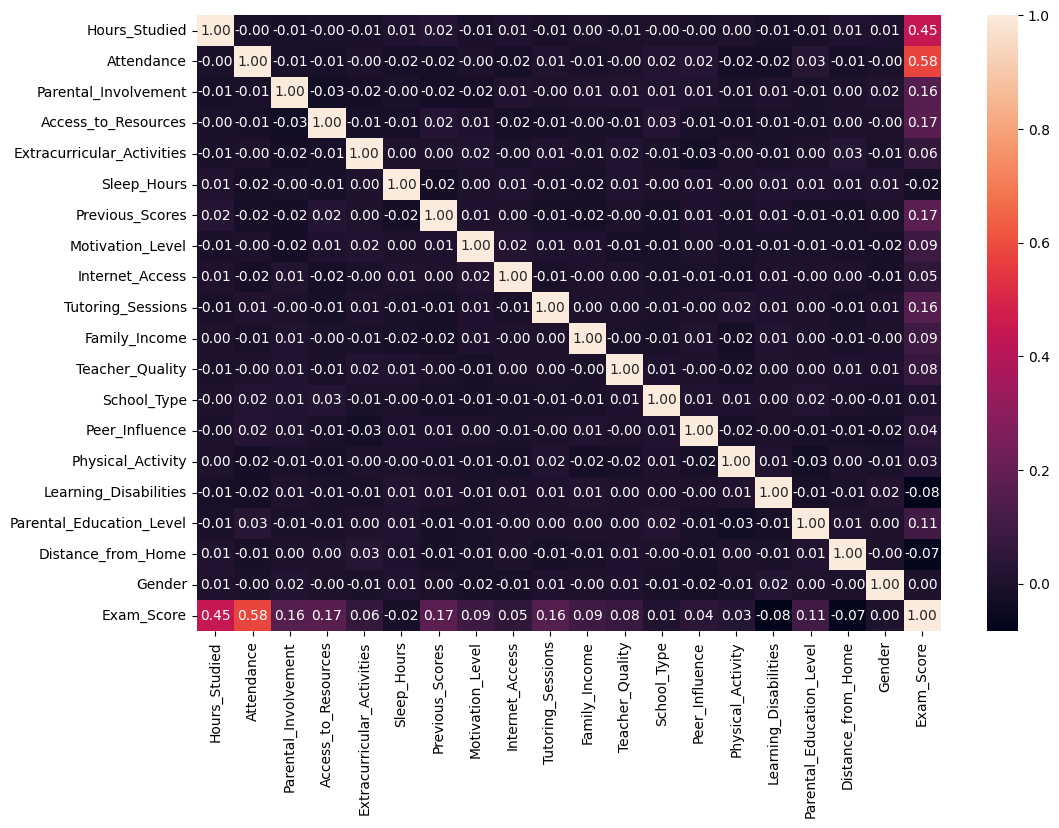

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(encoded_dataset.corr(),annot=True,fmt='.2f')
plt.show()

In [ ]:
corr_feature=encoded_dataset.corr()['Exam_Score'].drop('Exam_Score')

In [ ]:
corr_feature.sort_values(ascending=False)

,Exam_Score
Attendance,0.580259
Hours_Studied,0.445104
Previous_Scores,0.174283
Access_to_Resources,0.167856
Tutoring_Sessions,0.156829
Parental_Involvement,0.156014
Parental_Education_Level,0.105253
Family_Income,0.094555
Motivation_Level,0.088502
Teacher_Quality,0.075107


In [ ]:
x_feature_test = encoded_dataset.drop(['Exam_Score'],axis=1)
y_feature_test = encoded_dataset['Exam_Score']

In [ ]:
model_feature = RandomForestRegressor()
model_feature.fit(x_feature_test,y_feature_test)

RandomForestRegressor()

In [ ]:
model_feature.feature_importances_

array([0.24532994, 0.38156641, 0.03550603, 0.03490236, 0.00838873,
       0.02425815, 0.08558188, 0.01570478, 0.00638115, 0.03473844,
       0.01973182, 0.01281294, 0.00911013, 0.01353282, 0.02780317,
       0.00976987, 0.01687487, 0.01058303, 0.0074235 ])

In [ ]:
model_forest_feature=pd.Series(model_feature.feature_importances_,index=x_feature_test.columns,name='model_forest_feature')

In [ ]:
model_forest_feature.sort_values(ascending=False)

,model_forest_feature
Attendance,0.381566
Hours_Studied,0.245330
Previous_Scores,0.085582
Parental_Involvement,0.035506
Access_to_Resources,0.034902
Tutoring_Sessions,0.034738
Physical_Activity,0.027803
Sleep_Hours,0.024258
Family_Income,0.019732
Parental_Education_Level,0.016875


In [ ]:
selector = SelectKBest(score_func=f_regression,k='all')
selector.fit(x_feature_test,y_feature_test)

SelectKBest(k='all', score_func=<function f_regression at 0x7df96bfe1800>)

In [ ]:
np.cbrt(np.cbrt(selector.scores_))

array([2.26601264, 2.45476002, 1.75638597, 1.78595487, 1.43285597,
       1.07269605, 1.80138303, 1.54559746, 1.3673541 , 1.75847137,
       1.56868406, 1.48988059, 0.96899857, 1.3125556 , 1.16765189,
       1.52727675, 1.60688224, 1.4523414 , 0.81297401])

In [ ]:
pd.Series(np.round(selector.pvalues_,2),index=x_feature_test.columns)

,0
Hours_Studied,0.00
Attendance,0.00
Parental_Involvement,0.00
Access_to_Resources,0.00
Extracurricular_Activities,0.00
Sleep_Hours,0.17
Previous_Scores,0.00
Motivation_Level,0.00
Internet_Access,0.00
Tutoring_Sessions,0.00


In [ ]:
k_best_features=pd.Series(np.cbrt(np.cbrt(selector.scores_)),index=x_feature_test.columns,name='k_best_feature')

In [ ]:
result = permutation_importance(model_feature, x_feature_test, y_feature_test, n_repeats=10)

,0
Hours_Studied,0.621658
Attendance,0.939045
Parental_Involvement,0.090195
Access_to_Resources,0.089954
Extracurricular_Activities,0.007091
Sleep_Hours,0.036128
Previous_Scores,0.196474
Motivation_Level,0.025284
Internet_Access,0.005791
Tutoring_Sessions,0.069364


In [ ]:
importances_mean=pd.Series(result.importances_mean, index=x_feature_test.columns,name='permulation')

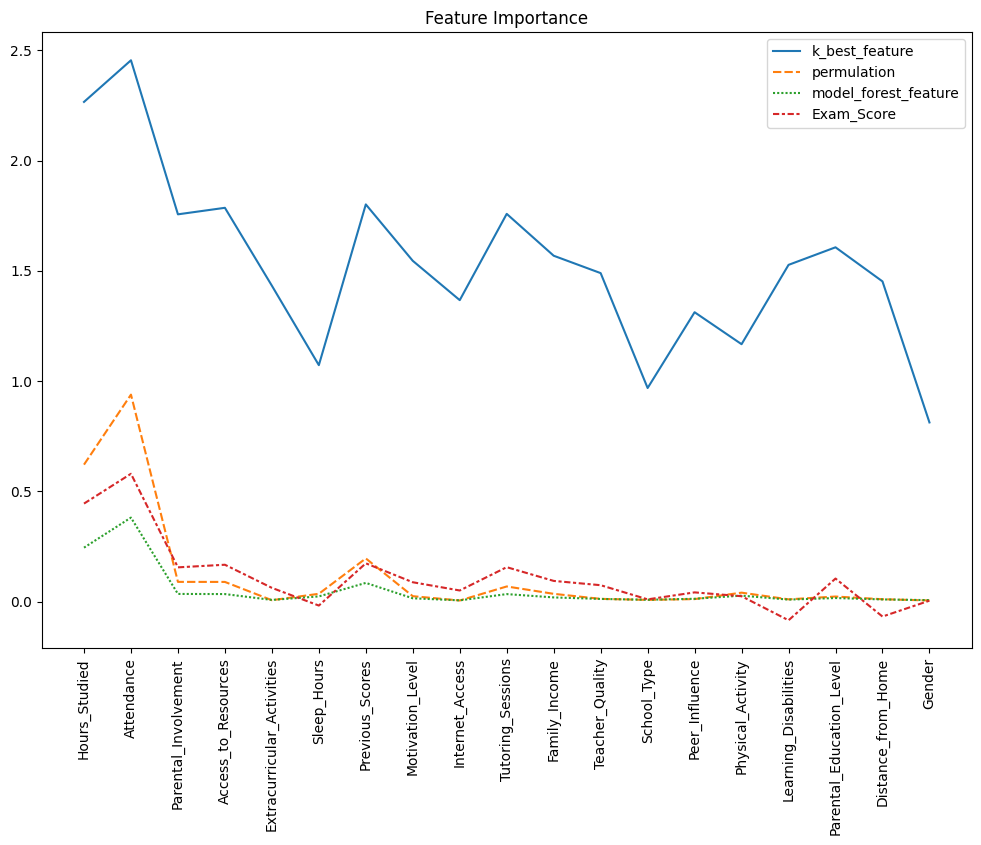

In [ ]:
plt.figure(figsize=(12,8))
sns.lineplot(pd.concat([k_best_features,importances_mean,model_forest_feature,corr_feature],axis=1))
plt.xticks(rotation=90)
plt.title('Feature Importance')
plt.show()

In [237]:
final_dataset=encoded_dataset[['Hours_Studied','Attendance','Parental_Involvement','Access_to_Resources','Extracurricular_Activities','Previous_Scores','Motivation_Level','Internet_Access','Tutoring_Sessions','Family_Income','Teacher_Quality','Peer_Influence','Physical_Activity','Learning_Disabilities','Parental_Education_Level','Distance_from_Home','Exam_Score']]

In [247]:
final_dataset.describe()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Exam_Score
count,6378.000000,6378.000000,6378.00000,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000
mean,19.977109,80.020853,1.08545,1.098150,0.596896,75.066165,0.907965,0.923957,1.495296,0.788021,1.197241,1.182659,2.972719,0.104735,0.705394,0.708373,67.252117
std,5.985460,11.550723,0.69502,0.698635,0.490560,14.400389,0.695758,0.265087,1.233984,0.743526,0.601064,0.752624,1.028926,0.306236,0.780570,0.902975,3.914217
min,1.000000,60.000000,0.00000,0.000000,0.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,1.00000,1.000000,0.000000,63.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000,65.000000
50%,20.000000,80.000000,1.00000,1.000000,1.000000,75.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,0.000000,1.000000,0.000000,67.000000
75%,24.000000,90.000000,2.00000,2.000000,1.000000,88.000000,1.000000,1.000000,2.000000,1.000000,2.000000,2.000000,4.000000,0.000000,1.000000,2.000000,69.000000
max,44.000000,100.000000,2.00000,2.000000,1.000000,100.000000,2.000000,1.000000,8.000000,2.000000,2.000000,2.000000,6.000000,1.000000,2.000000,2.000000,101.000000


In [259]:
x=final_dataset.drop(['Exam_Score'],axis=1)
y=final_dataset['Exam_Score']

In [260]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [261]:
x_train

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home
2356,18,95,0,2,0,96,1,1,2,1,2,1,4,1,0,2
4758,16,89,2,1,1,58,0,1,2,0,1,2,3,0,1,2
2281,16,69,1,2,1,55,1,1,1,1,2,0,1,0,0,2
485,11,65,1,2,0,78,1,1,2,0,1,2,3,0,2,0
4200,21,95,1,2,1,57,0,0,1,0,1,1,3,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3904,30,70,2,0,0,84,2,1,2,1,1,1,3,0,2,0
5378,24,90,0,0,1,97,2,1,3,0,1,1,4,0,0,0
5415,24,65,0,2,1,52,1,1,1,2,1,2,1,0,2,2
5582,30,91,1,2,1,95,0,1,1,1,2,1,3,0,1,0


In [262]:
ColumnT =ColumnTransformer(transformers=[
    ('standard',MinMaxScaler(),['Hours_Studied','Attendance','Previous_Scores'])
],remainder='passthrough')

In [263]:
pd.DataFrame(ColumnT.fit_transform(x_train),columns=ColumnT.get_feature_names_out())

,standard__Hours_Studied,standard__Attendance,standard__Previous_Scores,remainder__Parental_Involvement,remainder__Access_to_Resources,remainder__Extracurricular_Activities,remainder__Motivation_Level,remainder__Internet_Access,remainder__Tutoring_Sessions,remainder__Family_Income,remainder__Teacher_Quality,remainder__Peer_Influence,remainder__Physical_Activity,remainder__Learning_Disabilities,remainder__Parental_Education_Level,remainder__Distance_from_Home
0,0.395349,0.875,0.92,0.0,2.0,0.0,1.0,1.0,2.0,1.0,2.0,1.0,4.0,1.0,0.0,2.0
1,0.348837,0.725,0.16,2.0,1.0,1.0,0.0,1.0,2.0,0.0,1.0,2.0,3.0,0.0,1.0,2.0
2,0.348837,0.225,0.10,1.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,0.0,1.0,0.0,0.0,2.0
3,0.232558,0.125,0.56,1.0,2.0,0.0,1.0,1.0,2.0,0.0,1.0,2.0,3.0,0.0,2.0,0.0
4,0.465116,0.875,0.14,1.0,2.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,3.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5097,0.674419,0.250,0.68,2.0,0.0,0.0,2.0,1.0,2.0,1.0,1.0,1.0,3.0,0.0,2.0,0.0
5098,0.534884,0.750,0.94,0.0,0.0,1.0,2.0,1.0,3.0,0.0,1.0,1.0,4.0,0.0,0.0,0.0
5099,0.534884,0.125,0.04,0.0,2.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,0.0,2.0,2.0
5100,0.674419,0.775,0.90,1.0,2.0,1.0,0.0,1.0,1.0,1.0,2.0,1.0,3.0,0.0,1.0,0.0


In [264]:
pipline=Pipeline([
    ('Column',ColumnT),
    ('model',LinearRegression())
])

In [265]:
pipline.fit(x_train,y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('Column',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standard', MinMaxScaler(),
                                                  ['Hours_Studied',
                                                   'Attendance',
                                                   'Previous_Scores'])])),
                ('model', LinearRegression())])

In [266]:
prediction = pipline.predict(x_test)

In [267]:
mean_absolute_error(y_test,prediction)

0.6275343574399038

In [268]:
r2_score(y_test,prediction)

0.716343033438934

In [269]:
mean_squared_error(y_test,prediction)

4.407837788213123

In [270]:
residual = y_test - prediction

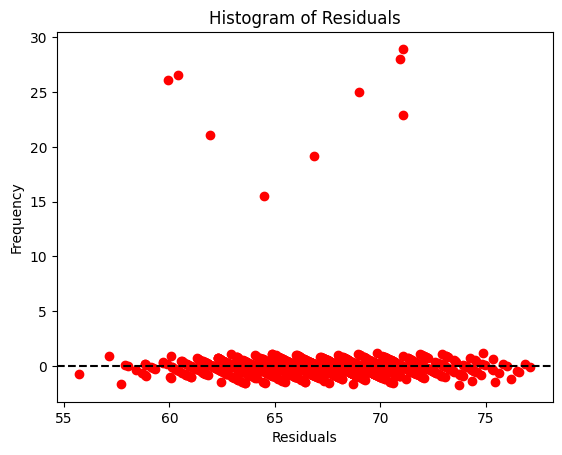

In [271]:
plt.scatter(prediction,residual,color='red')
plt.axhline(y=0,color='black',linestyle='--')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()

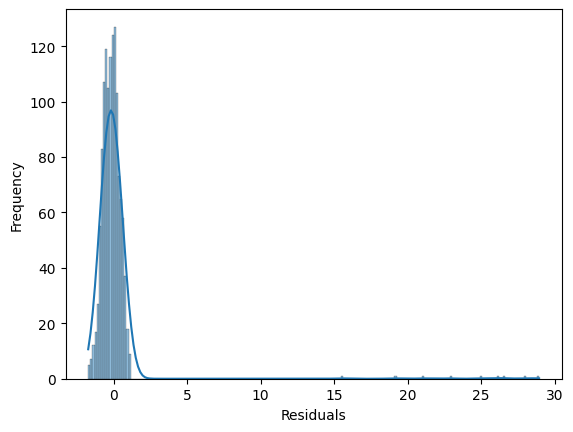

In [274]:
sns.histplot(residual,kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

**Polynomial Regression**

In [287]:
pol_pipline  = Pipeline([
    ('Column',ColumnT),
    ('poly',PolynomialFeatures(degree=2)),
    ('model',LinearRegression())
])

In [288]:
pol_pipline.fit(x_train,y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('Column',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standard', MinMaxScaler(),
                                                  ['Hours_Studied',
                                                   'Attendance',
                                                   'Previous_Scores'])])),
                ('poly', PolynomialFeatures()), ('model', LinearRegression())])

In [289]:
pol_predict = pol_pipline.predict(x_test)

In [290]:
mean_absolute_error(y_test,pol_predict)

0.5948446882363289

In [291]:
mean_squared_error(y_test,pol_predict)

4.330275043891374

In [292]:
r2_score(y_test,pol_predict)

0.7213344178386258

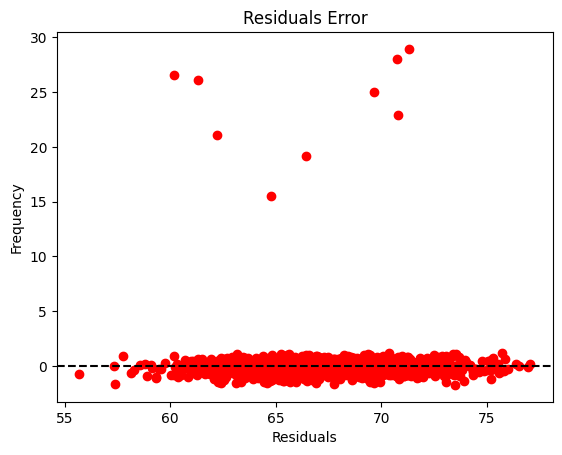

In [282]:
plt.scatter(pol_predict,residual,color='red')
plt.axhline(y=0,color='black',linestyle='--')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Residuals Error')
plt.show()

**Testing on Unseen Data**

**Example of Test Data 1:**


*   input = [31,96,2,2,1,65,2,1,0,0,1,1,2,0,0,1]
*   output = 74.0



In [302]:
input_user = np.array([31,96,2,2,1,65,2,1,0,0,1,1,2,0,0,1])

In [308]:
input_user=pd.DataFrame(input_user.reshape(1,-1),columns=x_train.columns)

In [314]:
pipline.predict(input_user)

array([74.1234549])

In [315]:
pol_pipline.predict(input_user)

array([74.24852458])

In [316]:
x_test

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home
2814,31,96,2,2,1,65,2,1,0,0,1,1,2,0,0,1
4421,13,84,1,1,1,94,1,1,3,1,1,0,2,1,0,0
4282,27,83,1,1,1,76,1,1,1,0,2,1,4,0,0,0
1246,20,97,2,1,1,94,2,1,1,1,1,0,1,0,1,2
4699,17,76,1,2,1,95,0,1,1,0,1,2,4,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6220,27,76,2,2,1,55,1,1,3,0,1,2,0,0,0,2
5485,24,63,1,1,1,85,2,1,1,0,1,1,3,0,0,1
5076,20,81,0,1,1,61,0,0,0,0,1,1,4,1,0,0
6503,12,92,0,0,1,78,2,1,3,1,2,0,2,0,1,0


In [331]:
y_test.loc[6503]

np.int64(67)

**Example of Test Data 2:**


*   input = [27,90,1,2,0,86,2,1,2,1,1,1,3,0,1,2]
*   output = 73.0

In [332]:
input_user_2=np.array([27,90,1,2,0,86,2,1,2,1,1,1,3,0,1,2])

In [333]:
input_user_2=pd.DataFrame(input_user_2.reshape(1,-1),columns=x_train.columns)

In [341]:
pipline.predict(input_user_2)

array([73.11447186])

In [342]:
pol_pipline.predict(input_user_2)

array([73.0846441])

**Example of Test Data 3:**


*   input = [12,92,0,0,1,78,2,1,3,1,2,0,2,0,1,0]
*   output = 67

In [337]:
input_user_3=np.array([12,92,0,0,1,78,2,1,3,1,2,0,2,0,1,0])

In [338]:
input_user_3=pd.DataFrame(input_user_3.reshape(1,-1),columns=x_train.columns)

In [339]:
pipline.predict(input_user_3)

array([67.38328347])

In [340]:
pol_pipline.predict(input_user_3)

array([67.95005559])

**By comparison on Both Linear Resgression (Simple) VS Polynomial Regression
*'We Got Best Result on Simple Linear Regression'***

In [345]:
pickle.dump(pipline,open('model_linear.pkl','wb'))